In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# To avoid the kernel dead state
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
# path to training and vaildation data
train_dir = "train"
val_dir = "val"
test_dir = "test"

In [4]:
# checking if the classes match in both directories
os.listdir(train_dir) == os.listdir(val_dir)

True

In [5]:
# checking if the classes match in both directories
os.listdir(train_dir) == os.listdir(test_dir)

True

In [1]:
image_size = (150, 150)    # target image size
batch_size = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=43,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=43,
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=43,
    image_size=image_size,
    batch_size=batch_size,
)

NameError: name 'tf' is not defined

# Model - 1

In [7]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_1 = keras.Model(inputs, outputs)

In [8]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 5)                 876165    
                                                             

In [11]:
model_1.compile(loss="sparse_categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_1 = model_1.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
48/48 [==============================] - 32s 643ms/step - loss: 1.1482 - accuracy: 0.5926 - val_loss: 1.4169 - val_accuracy: 0.4499
Epoch 2/10
48/48 [==============================] - 32s 643ms/step - loss: 0.7730 - accuracy: 0.7400 - val_loss: 1.1493 - val_accuracy: 0.5794
Epoch 3/10
48/48 [==============================] - 31s 629ms/step - loss: 0.5426 - accuracy: 0.8400 - val_loss: 1.1174 - val_accuracy: 0.5978
Epoch 4/10
48/48 [==============================] - 31s 623ms/step - loss: 0.4142 - accuracy: 0.8904 - val_loss: 1.2365 - val_accuracy: 0.5809
Epoch 5/10
48/48 [==============================] - 31s 630ms/step - loss: 0.3039 - accuracy: 0.9255 - val_loss: 1.1460 - val_accuracy: 0.5824
Epoch 6/10
48/48 [==============================] - 30s 609ms/step - loss: 0.2240 - accuracy: 0.9546 - val_loss: 2.3512 - val_accuracy: 0.4314
Epoch 7/10
48/48 [==============================] - 31s 623ms/step - loss: 0.2002 - accuracy: 0.9619 - val_loss: 1.4037 - val_accuracy: 0.5624

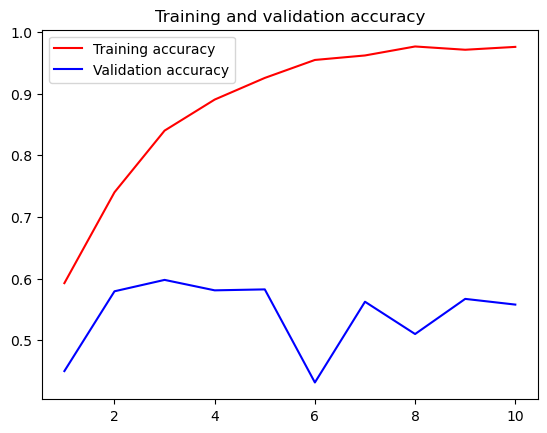

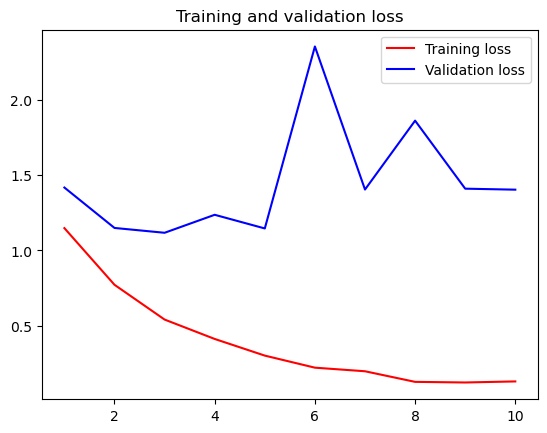

In [12]:
# let's create a function to plot the accuracy and loss curves 
def plot_curves(hist):
    accuracy = hist.history["accuracy"]
    val_accuracy = hist.history["val_accuracy"]
    loss = hist.history["loss"]
    val_loss = hist.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, "r", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, "r", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()
    
# plot the curves for our base model
plot_curves(hist_1)

In [13]:
# Let's save this model 
model_1.save('Models/base_model_001.keras')

In [14]:
model_1.predict(test_ds)

11/11 [==============================] - 3s 194ms/step


array([[1.1059537e-04, 5.4286313e-09, 7.1612585e-01, 8.7885849e-07,
        2.8376263e-01],
       [9.3921443e-04, 7.7601885e-07, 1.8541200e-01, 2.6138776e-03,
        8.1103414e-01],
       [9.8489627e-02, 2.1904865e-01, 3.0215677e-02, 8.2122199e-02,
        5.7012379e-01],
       ...,
       [1.1682823e-04, 8.5056020e-04, 1.8600714e-06, 9.6740842e-01,
        3.1622209e-02],
       [5.4455906e-02, 8.8001317e-01, 1.3683406e-03, 3.9623614e-04,
        6.3766241e-02],
       [9.9975787e-02, 1.6022844e-02, 7.5666113e-03, 1.7032392e-02,
        8.5940242e-01]], dtype=float32)

In [15]:
model_1.evaluate(test_ds)

11/11 [==============================] - 3s 185ms/step - loss: 1.3384 - accuracy: 0.5855


[1.338409185409546, 0.5855161547660828]

# Model - 2

In [18]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(64, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = keras.Model(inputs, outputs)

In [19]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                       

In [20]:
model_2.compile(loss="sparse_categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_2 = model_2.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
48/48 [==============================] - 63s 1s/step - loss: 1.6704 - accuracy: 0.4184 - val_loss: 1.2813 - val_accuracy: 0.4669
Epoch 2/10
48/48 [==============================] - 62s 1s/step - loss: 1.1360 - accuracy: 0.5502 - val_loss: 1.7181 - val_accuracy: 0.3883
Epoch 3/10
48/48 [==============================] - 62s 1s/step - loss: 0.9659 - accuracy: 0.6274 - val_loss: 1.0247 - val_accuracy: 0.5901
Epoch 4/10
48/48 [==============================] - 62s 1s/step - loss: 0.7965 - accuracy: 0.7125 - val_loss: 1.6726 - val_accuracy: 0.4576
Epoch 5/10
48/48 [==============================] - 64s 1s/step - loss: 0.6318 - accuracy: 0.7940 - val_loss: 1.2627 - val_accuracy: 0.5655
Epoch 6/10
48/48 [==============================] - 63s 1s/step - loss: 0.4938 - accuracy: 0.8470 - val_loss: 1.2375 - val_accuracy: 0.5501
Epoch 7/10
48/48 [==============================] - 62s 1s/step - loss: 0.3517 - accuracy: 0.8923 - val_loss: 1.1904 - val_accuracy: 0.5871
Epoch 8/10
48/48 [==

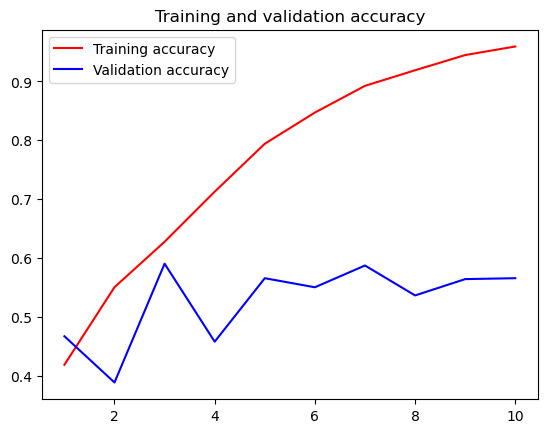

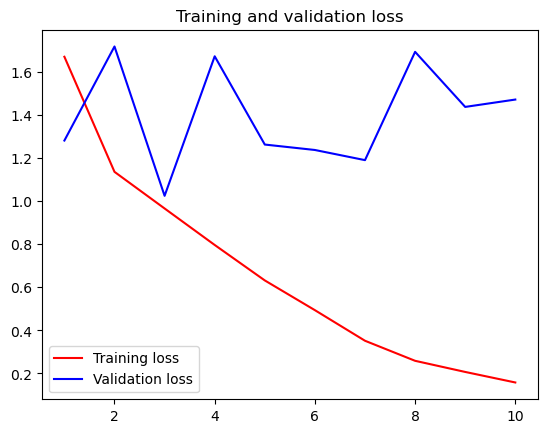

In [21]:
plot_curves(hist_2)

In [22]:
model_2.predict(test_ds)

11/11 [==============================] - 4s 328ms/step


array([[2.0217538e-02, 2.9517031e-01, 1.6198188e-01, 8.8312171e-02,
        4.3431813e-01],
       [8.4248042e-01, 1.0143496e-01, 9.6822707e-03, 2.7256603e-03,
        4.3676607e-02],
       [8.2955929e-03, 5.5756211e-01, 6.8089630e-06, 4.3291181e-01,
        1.2237646e-03],
       ...,
       [5.9547007e-02, 9.4028872e-01, 4.8103258e-05, 4.9041115e-05,
        6.7011693e-05],
       [7.1837562e-03, 2.5394447e-03, 1.5241413e-01, 3.1799117e-01,
        5.1987147e-01],
       [4.1559977e-03, 1.4887160e-03, 9.6553528e-01, 4.7489288e-04,
        2.8345160e-02]], dtype=float32)

In [23]:
model_2.evaluate(test_ds)

11/11 [==============================] - 4s 318ms/step - loss: 1.5311 - accuracy: 0.5639


[1.5310968160629272, 0.5639445185661316]

# Model - 3

In [26]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(64, (5, 5), activation="relu")(x)
x = layers.MaxPooling2D(3, 3)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_3 = keras.Model(inputs, outputs)

In [28]:
model_3.compile(loss="sparse_categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_3 = model_3.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
48/48 [==============================] - 51s 1s/step - loss: 0.3571 - accuracy: 0.9364 - val_loss: 1.5621 - val_accuracy: 0.5455
Epoch 2/10
48/48 [==============================] - 54s 1s/step - loss: 0.0965 - accuracy: 0.9824 - val_loss: 1.8664 - val_accuracy: 0.5439
Epoch 3/10
48/48 [==============================] - 49s 1s/step - loss: 0.1057 - accuracy: 0.9762 - val_loss: 1.8953 - val_accuracy: 0.5085
Epoch 4/10
48/48 [==============================] - 50s 1s/step - loss: 0.1481 - accuracy: 0.9765 - val_loss: 1.9570 - val_accuracy: 0.5609
Epoch 5/10
48/48 [==============================] - 49s 1s/step - loss: 0.0872 - accuracy: 0.9854 - val_loss: 2.0504 - val_accuracy: 0.5254
Epoch 6/10
48/48 [==============================] - 50s 1s/step - loss: 0.1216 - accuracy: 0.9811 - val_loss: 2.0262 - val_accuracy: 0.5485
Epoch 7/10
48/48 [==============================] - 52s 1s/step - loss: 0.0709 - accuracy: 0.9861 - val_loss: 2.2809 - val_accuracy: 0.5485
Epoch 8/10
48/48 [==

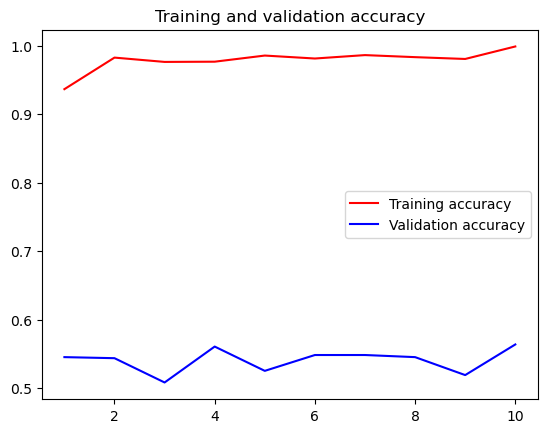

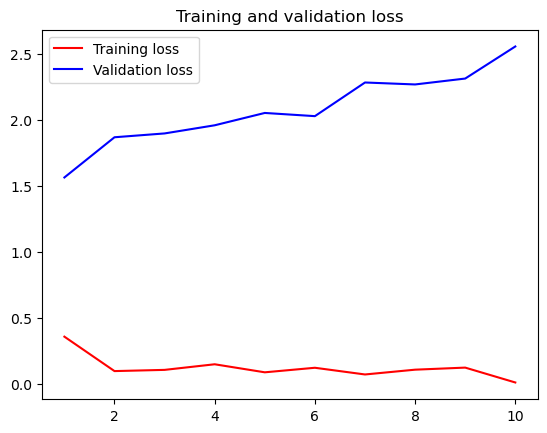

In [36]:
plot_curves(hist_3)

In [30]:
model_3.evaluate(test_ds)

11/11 [==============================] - 3s 252ms/step - loss: 2.4994 - accuracy: 0.5624


[2.4994301795959473, 0.562403678894043]

# Model - 4

In [33]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(64, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(128, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_4 = keras.Model(inputs, outputs)

In [34]:
model_4.compile(loss="sparse_categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_4 = model_4.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
48/48 [==============================] - 89s 2s/step - loss: 1.4653 - accuracy: 0.3892 - val_loss: 1.2494 - val_accuracy: 0.4823
Epoch 2/10
48/48 [==============================] - 90s 2s/step - loss: 1.1916 - accuracy: 0.5273 - val_loss: 1.7985 - val_accuracy: 0.3683
Epoch 3/10
48/48 [==============================] - 93s 2s/step - loss: 1.0727 - accuracy: 0.5807 - val_loss: 1.1224 - val_accuracy: 0.5208
Epoch 4/10
48/48 [==============================] - 86s 2s/step - loss: 0.9310 - accuracy: 0.6529 - val_loss: 1.5901 - val_accuracy: 0.4592
Epoch 5/10
48/48 [==============================] - 85s 2s/step - loss: 0.8444 - accuracy: 0.6873 - val_loss: 1.1705 - val_accuracy: 0.5593
Epoch 6/10
48/48 [==============================] - 84s 2s/step - loss: 0.7173 - accuracy: 0.7406 - val_loss: 0.9954 - val_accuracy: 0.6117
Epoch 7/10
48/48 [==============================] - 85s 2s/step - loss: 0.6009 - accuracy: 0.7820 - val_loss: 0.9925 - val_accuracy: 0.6471
Epoch 8/10
48/48 [==

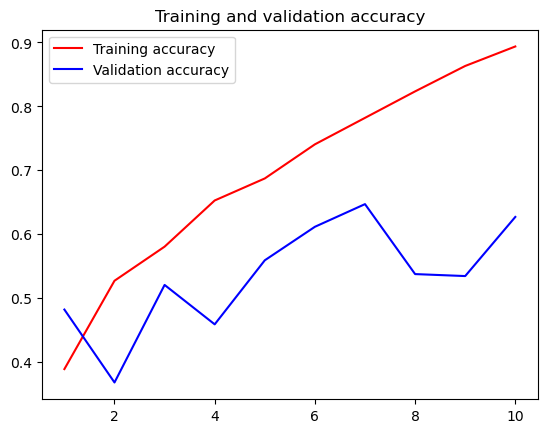

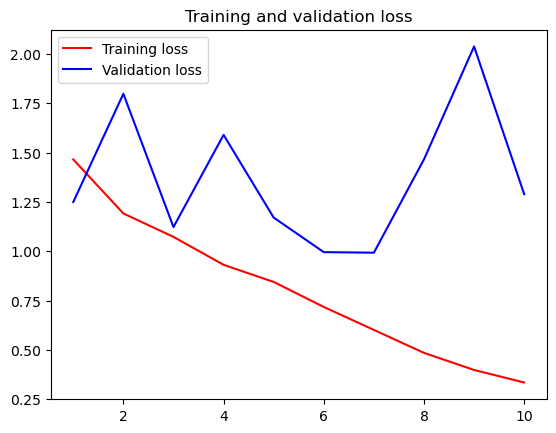

In [37]:
plot_curves(hist_4)

In [35]:
model_4.evaluate(test_ds)

11/11 [==============================] - 6s 478ms/step - loss: 1.3306 - accuracy: 0.6055


[1.330579161643982, 0.6055470108985901]

# Model 5

In [38]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(64, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(128, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(128, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_5 = keras.Model(inputs, outputs)

In [39]:
model_5.compile(loss="sparse_categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_5 = model_5.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
48/48 [==============================] - 89s 2s/step - loss: 1.5299 - accuracy: 0.3299 - val_loss: 1.3200 - val_accuracy: 0.4022
Epoch 2/10
48/48 [==============================] - 86s 2s/step - loss: 1.2427 - accuracy: 0.4813 - val_loss: 1.2896 - val_accuracy: 0.4576
Epoch 3/10
48/48 [==============================] - 87s 2s/step - loss: 1.1416 - accuracy: 0.5561 - val_loss: 1.0278 - val_accuracy: 0.5763
Epoch 4/10
48/48 [==============================] - 89s 2s/step - loss: 1.0271 - accuracy: 0.5906 - val_loss: 0.9955 - val_accuracy: 0.6194
Epoch 5/10
48/48 [==============================] - 92s 2s/step - loss: 0.9408 - accuracy: 0.6356 - val_loss: 0.9304 - val_accuracy: 0.6379
Epoch 6/10
48/48 [==============================] - 86s 2s/step - loss: 0.8638 - accuracy: 0.6671 - val_loss: 0.9751 - val_accuracy: 0.6271
Epoch 7/10
48/48 [==============================] - 89s 2s/step - loss: 0.8216 - accuracy: 0.6949 - val_loss: 0.8508 - val_accuracy: 0.6610
Epoch 8/10
48/48 [==

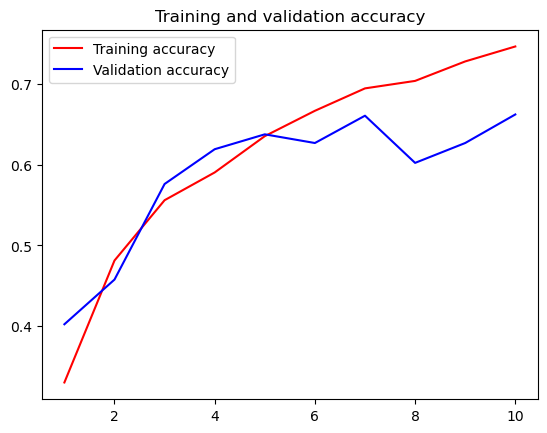

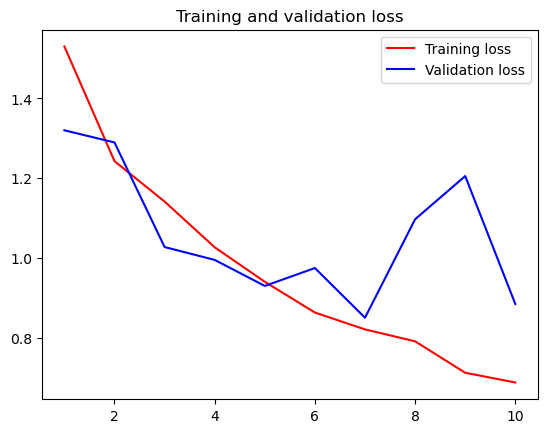

In [40]:
plot_curves(hist_5)

In [41]:
model_5.evaluate(test_ds)

11/11 [==============================] - 6s 477ms/step - loss: 0.9787 - accuracy: 0.6333


[0.9786588549613953, 0.633281946182251]

# Model 6

In [42]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(64, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(128, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(256, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_6 = keras.Model(inputs, outputs)

In [43]:
model_6.compile(loss="sparse_categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_6 = model_6.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
48/48 [==============================] - 98s 2s/step - loss: 1.4402 - accuracy: 0.3680 - val_loss: 1.3366 - val_accuracy: 0.4022
Epoch 2/10
48/48 [==============================] - 95s 2s/step - loss: 1.2080 - accuracy: 0.4909 - val_loss: 1.3449 - val_accuracy: 0.4884
Epoch 3/10
48/48 [==============================] - 96s 2s/step - loss: 1.1118 - accuracy: 0.5614 - val_loss: 1.4428 - val_accuracy: 0.4761
Epoch 4/10
48/48 [==============================] - 99s 2s/step - loss: 1.0037 - accuracy: 0.6131 - val_loss: 0.9379 - val_accuracy: 0.6086
Epoch 5/10
48/48 [==============================] - 98s 2s/step - loss: 0.9093 - accuracy: 0.6496 - val_loss: 1.1550 - val_accuracy: 0.5778
Epoch 6/10
48/48 [==============================] - 98s 2s/step - loss: 0.8374 - accuracy: 0.6867 - val_loss: 1.8420 - val_accuracy: 0.3929
Epoch 7/10
48/48 [==============================] - 96s 2s/step - loss: 0.7799 - accuracy: 0.7135 - val_loss: 0.9485 - val_accuracy: 0.6456
Epoch 8/10
48/48 [==

In [44]:
model_6.evaluate(test_ds)

11/11 [==============================] - 6s 505ms/step - loss: 1.0230 - accuracy: 0.6579


[1.0229952335357666, 0.6579352617263794]

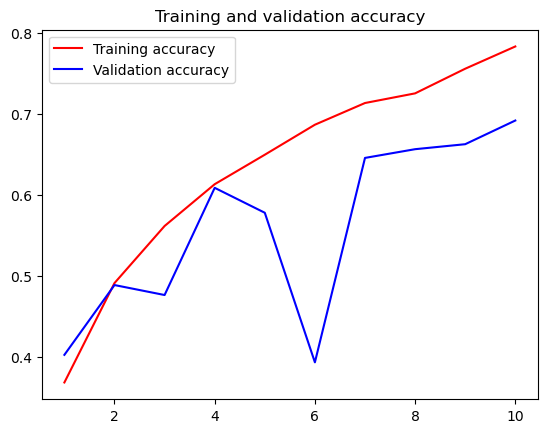

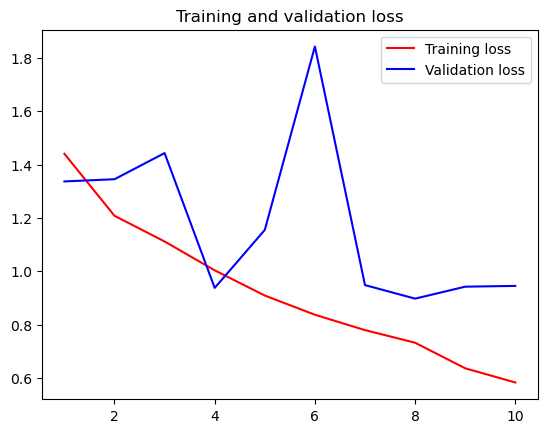

In [45]:
plot_curves(hist_6)

# Model - 7

In [46]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(64, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(128, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(256, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(512, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_7 = keras.Model(inputs, outputs)

In [47]:
model_7.compile(loss="sparse_categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_7 = model_7.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
48/48 [==============================] - 109s 2s/step - loss: 1.6393 - accuracy: 0.3107 - val_loss: 1.3884 - val_accuracy: 0.4468
Epoch 2/10
48/48 [==============================] - 108s 2s/step - loss: 1.2983 - accuracy: 0.4439 - val_loss: 1.3894 - val_accuracy: 0.3236
Epoch 3/10
48/48 [==============================] - 108s 2s/step - loss: 1.1892 - accuracy: 0.5058 - val_loss: 1.4287 - val_accuracy: 0.3621
Epoch 4/10
48/48 [==============================] - 106s 2s/step - loss: 1.0763 - accuracy: 0.5648 - val_loss: 1.2283 - val_accuracy: 0.5131
Epoch 5/10
48/48 [==============================] - 101s 2s/step - loss: 0.9730 - accuracy: 0.6280 - val_loss: 0.9240 - val_accuracy: 0.6287
Epoch 6/10
48/48 [==============================] - 102s 2s/step - loss: 0.8941 - accuracy: 0.6509 - val_loss: 0.9977 - val_accuracy: 0.6117
Epoch 7/10
48/48 [==============================] - 106s 2s/step - loss: 0.8375 - accuracy: 0.6734 - val_loss: 1.1353 - val_accuracy: 0.5285
Epoch 8/10
48

In [48]:
model_7.evaluate(test_ds)

11/11 [==============================] - 8s 642ms/step - loss: 1.2801 - accuracy: 0.5763


[1.2800976037979126, 0.5762711763381958]

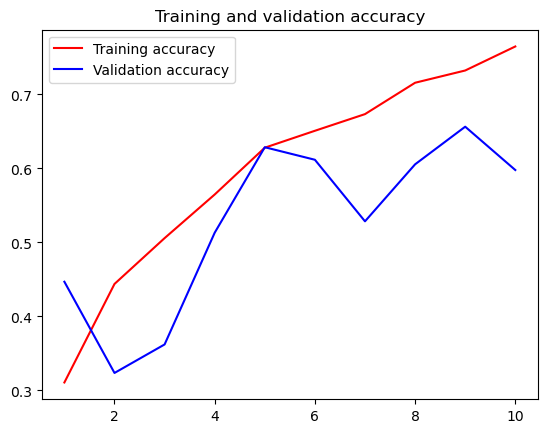

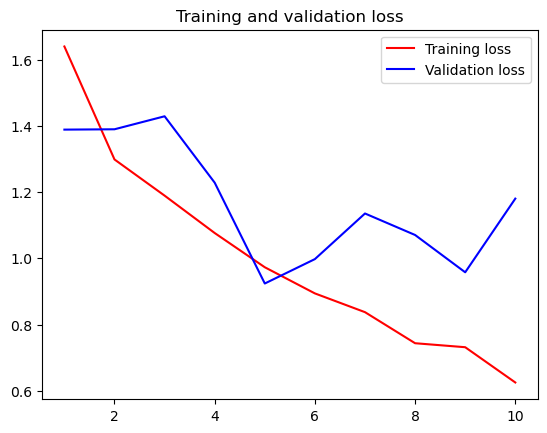

In [49]:
plot_curves(hist_7)

In [50]:
hist_7 = model_7.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
48/48 [==============================] - 109s 2s/step - loss: 0.5432 - accuracy: 0.7960 - val_loss: 1.4320 - val_accuracy: 0.6179
Epoch 2/10
48/48 [==============================] - 108s 2s/step - loss: 0.4704 - accuracy: 0.8297 - val_loss: 1.1728 - val_accuracy: 0.6687
Epoch 3/10
48/48 [==============================] - 110s 2s/step - loss: 0.4319 - accuracy: 0.8513 - val_loss: 1.0767 - val_accuracy: 0.6456
Epoch 4/10
48/48 [==============================] - 109s 2s/step - loss: 0.3121 - accuracy: 0.8851 - val_loss: 1.2917 - val_accuracy: 0.6410
Epoch 5/10
48/48 [==============================] - 116s 2s/step - loss: 0.2353 - accuracy: 0.9149 - val_loss: 1.8218 - val_accuracy: 0.6117
Epoch 6/10
48/48 [==============================] - 120s 2s/step - loss: 0.2236 - accuracy: 0.9318 - val_loss: 1.7658 - val_accuracy: 0.5470
Epoch 7/10
48/48 [==============================] - 118s 2s/step - loss: 0.2570 - accuracy: 0.9291 - val_loss: 1.2374 - val_accuracy: 0.6810
Epoch 8/10
48

In [51]:
model_7.evaluate(test_ds)

11/11 [==============================] - 8s 679ms/step - loss: 1.6263 - accuracy: 0.6749


[1.6263301372528076, 0.6748844385147095]

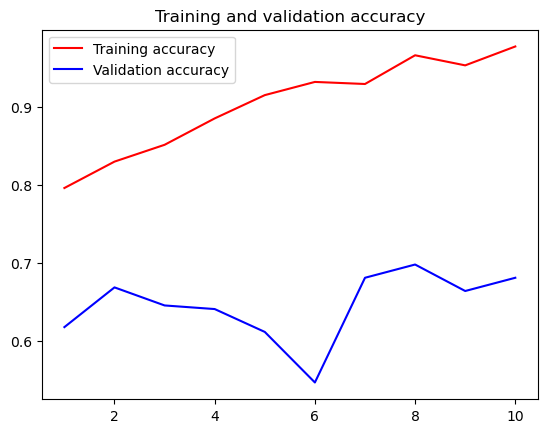

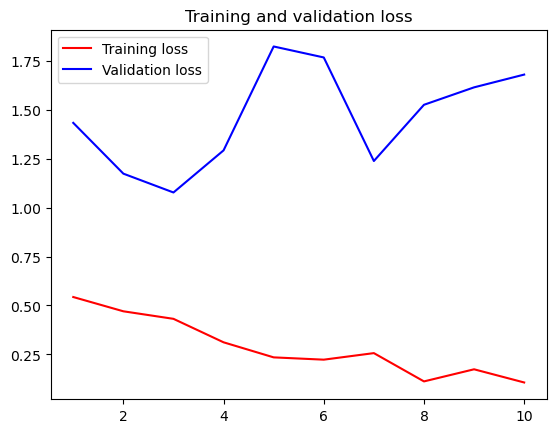

In [52]:
plot_curves(hist_7)